In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nbimporter
from models import pandas_to_latex

Importing Jupyter notebook from /Users/mortenolsenosvik/Desktop/project-thesis/src/models/pandas_to_latex.ipynb


### Data Processing: 
#### Loading and Structuring

In [3]:
# load complete alarmlog from turbines at Bessaker
alarms = pd.read_excel('../../../XAI_Datasets/Data/DataFromBazefield/AlarmlogBessaker.xlsx')

# to drop certain alarms:
# alarms = alarms[alarms.Alarm != 'Status_2_Substatus_1']

# sort alrams based on turbine and store in a dictionary 
individual_turbine_alarm = {}

for i in range(25):
    if(i+1 < 10):
        individual_turbine_alarm[i+1] = alarms.loc[alarms['Turbine'] == 'BESS-WTG0{0}'.format(i+1)]
    else :
        individual_turbine_alarm[i+1] = alarms.loc[alarms['Turbine'] == 'BESS-WTG{0}'.format(i+1)]
    
    individual_turbine_alarm[i+1] = individual_turbine_alarm[i+1].reset_index(drop=True)

In [4]:
individual_turbine_alarm[1]

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
0,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-06 14:56:33,2019-10-06 15:06:51,00:10:18,Alarm,NaN
1,Bessaker,BESS-WTG01,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),2019-10-02 12:26:37,2019-10-02 12:26:43,00:00:06,Alarm,NaN
2,Bessaker,BESS-WTG01,Status_240_Substatus_1,240:1,A,R 240:1 STATUS: Remote control PC (switched off),2019-10-02 12:24:29,2019-10-02 12:26:37,00:02:08,Alarm,NaN
3,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-02 10:01:04,2019-10-02 10:06:16,00:05:12,Alarm,NaN
4,Bessaker,BESS-WTG01,Status_17_Substatus_0,0.708333,A,N 17:0 Test safety system - (Test safety sys...,2019-10-02 10:00:04,2019-10-02 10:01:04,00:01:00,Alarm,NaN
5,Bessaker,BESS-WTG01,Status_304_Substatus_97,304:97,A,R 304:97 Data bus error (Timeout) - (Rectifie...,2019-10-01 15:33:44,2019-10-01 15:37:48,00:04:04,Alarm,NaN
6,Bessaker,BESS-WTG01,Status_62_Substatus_30,62:30,A,R 62:30 Feeding fault - (Feeding safety circu...,2019-10-01 15:33:43,2019-10-01 15:33:44,00:00:01,Alarm,NaN
7,Bessaker,BESS-WTG01,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),2019-10-01 09:27:30,2019-10-01 15:33:11,06:05:41,Alarm,NaN
8,Bessaker,BESS-WTG01,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2019-09-30 14:22:31,2019-10-01 09:27:30,19:04:59,Alarm,NaN
9,Bessaker,BESS-WTG01,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),2019-09-30 14:22:25,2019-09-30 14:22:31,00:00:06,Alarm,NaN


In [5]:
# Parsing time:
def get_time_duration(alarm_1, alarm_2):
    end_of_alarm_1 = alarm_1.End
    start_of_alarm_2 = alarm_2.Start
    duration = start_of_alarm_2 - end_of_alarm_1
    duration_mins = duration/np.timedelta64(1, 'm')
    duration_hrs = duration/np.timedelta64(1, 'h')
    duration_days = duration/np.timedelta64(1, 'D')

    #print('Difference between start and end in minutes: {0}'.format(duration_mins))
    #print('Difference between start and end in hours: {0}'.format(duration_hrs))
    #print('Difference between start and end in days: {0}'.format(duration_days))
    return duration_hrs

get_time_duration(individual_turbine_alarm[1].iloc[1], individual_turbine_alarm[1].iloc[0])

98.49722222222222

In [6]:
#REMEBER: the dataset has the latest alarms on top

def groupConsecutiveAlarms(turbine_data, hour_limit):
    all_consecutive_errors        = []
    all_consecutive_alarms        = []
    all_consecutive_codes         = []
    all_consecutive_descriptions  = np.array([])

    test_sample = turbine_data
    current_alarm_count = test_sample.shape[0]-1

    for i in reversed(range(test_sample.shape[0])):
    #for i in reversed(range(individual_alarm[1].shape[0])):

        build_array = True
        current_alarm_count = i
        if(current_alarm_count >= i):

            new_alarm_count = i-1
            root_alarm = test_sample.iloc[current_alarm_count]

            # Create a list with following alarms
            whole_consecutive_alarms = []
            whole_consecutive_alarms.append(root_alarm)

            consecutive_alarms = []
            consecutive_alarms.append(root_alarm.Alarm)
            
            alarm_codes = []
            alarm_codes.append(root_alarm.Code)
            
            alarm_descriptions = []
            altered_description = ' '.join(np.array(root_alarm.Description.split()[2:]))
            alarm_descriptions.append(altered_description)
            #alarm_descriptions.append(root_alarm.Description)
            duration = []

            while(build_array == True and new_alarm_count >= 0):
                current_alarm = test_sample.iloc[i]
                new_alarm = test_sample.iloc[new_alarm_count]
                duration_hrs = get_time_duration(current_alarm, new_alarm)
                
                if(duration_hrs < hour_limit):
                    whole_consecutive_alarms.append(new_alarm)
                    consecutive_alarms.append(new_alarm.Alarm)
                    alarm_codes.append(new_alarm.Code)
                    altered_description = '---> ' + ' '.join(np.array(new_alarm.Description.split()[2:]))
                    alarm_descriptions.append(altered_description)
                    #alarm_descriptions.append(new_alarm.Description)
                    duration.append(duration_hrs)

                    if(len(consecutive_alarms) > 1):
                        all_consecutive_errors.append(whole_consecutive_alarms)
                        all_consecutive_alarms.append(consecutive_alarms)
                        all_consecutive_codes.append(alarm_codes)
                        #all_consecutive_descriptions.append(alarm_descriptions)
                        all_consecutive_descriptions = np.append(all_consecutive_descriptions, ''.join(alarm_descriptions))
                        
#                        print(root_alarm.End)
 #                       print(alarm_descriptions)
  #                      print(all_consecutive_descriptions)
   #                     print(duration)
                    
                    current_alarm_count = current_alarm_count - 1
                    new_alarm_count = new_alarm_count - 1
                else:
                    build_array = False
                    
                        
    return all_consecutive_errors, all_consecutive_alarms, all_consecutive_codes, all_consecutive_descriptions


def printLog(error_list):      
    # Print the consecutive alarms
    print(len(error_list))
    for i in range(len(error_list)):
        print('\nList {0} begins {1} and contains the following alarms: '
              .format(i, error_list[i][0].Start))
        for j in range(len(error_list[i])):
            print('Alarm: {} \tStarted: {} \tEnded{}'.format(error_list[i][j].Alarm, 
                                                           error_list[i][j].Start, 
                                                           error_list[i][j].End))

def simplePrintLog(error_list):
    # Print the consecutive alarms
    print(len(error_list))
    for i in range(len(error_list)):
        print('\nList {0} contains the following alarms: '.format(i))
        for j in range(len(error_list[i])):
            print('Alarm: {}'.format(error_list[i][j]))

In [7]:
def countAlarmsForAllTurbines(individual_turbine_alarm, hour_limit):
    all_turbine_descriptions = []
    turbine_descriptions = {}

    for turbine in individual_turbine_alarm:
        whole_alarm_list, only_alarms, only_codes, only_descriptions = groupConsecutiveAlarms(individual_turbine_alarm[turbine], hour_limit)
        turbine_descriptions[turbine] = countSameLog(only_descriptions.tolist())
        all_turbine_descriptions.append(only_descriptions)
        #visualizeCount(turbine_descriptions[turbine], 'Turbine {}'.format(turbine))
        print(f'Counting alarms for turbine {len(all_turbine_descriptions)}/25', end='\r')

    flat_all_turbine_descriptions = []
    for sublist in all_turbine_descriptions:
        for item in sublist:
            flat_all_turbine_descriptions.append(item)
    counted_all_turbine_descriptions = countSameLog(flat_all_turbine_descriptions)
    turbine_descriptions['All Turbines'] = counted_all_turbine_descriptions
    print('\nAll Turbines Done')
    return turbine_descriptions

In [12]:
def countSameLog(simle_alarm_log):
    repeated_log = {}
    for i in range(len(simle_alarm_log)):
        name = ''
        for alarm in simle_alarm_log[i]:
            name = '{0}{1}'.format(name, alarm)
        
        number_of_repetition = simle_alarm_log.count(simle_alarm_log[i])
        if(number_of_repetition > 1):
            repeated_log[name] = number_of_repetition
            
    sorted_repeated_log = sorted(repeated_log.items(), key=lambda kv: kv[1], reverse=True)

#    print('Occurrence\tAlarms')
#    for j in range(len(sorted_repeated_log)):
#        print('{}\t{}'.format(sorted_repeated_log[j][1], sorted_repeated_log[j][0]))
    return(sorted_repeated_log)

def visualizeCount(sorted_alarm_log, title, hour_limit):
    labels = []
    occurrance = []
    
    # Remove the alarm sequence "wind speed too low, wind speed too low"
#    sorted_alarm_log = sorted_alarm_log[1:]
    for i in range(len(sorted_alarm_log)):
        #if(sorted_alarm_log[i][1]==184):
        #    sorted_alarm_log.remove(sorted_alarm_log[i])
         #   print(sorted_alarm_log[i])
        #only show alarm sequence counted more than 19 times for all turbines
        if(title == 'All Turbines'):
            if(sorted_alarm_log[i][1] > 45 and sorted_alarm_log[i][1] <500):
                occurrance.append(sorted_alarm_log[i][1])
                labels.append(sorted_alarm_log[i][0])
        else:
            occurrance.append(sorted_alarm_log[i][1])
            labels.append(sorted_alarm_log[i][0])

    x = np.arange(len(labels))
    y = np.arange(0, max(occurrance)+60, 50)
    if(len(labels) > 60):
        fig, ax = plt.subplots(1,1,figsize=(120,160))
        ax.set_title('Occurrances of Fault Series {} for {} Hour(s)'.format(title, hour_limit), fontsize=30)
    else:
        fig, ax = plt.subplots(1,1,figsize=(20, 30))
        #ax.set_title('Occurrances of Fault Series Turbine: {} for {} Hour(s)'.format(title, hour_limit), fontsize=60)
    rects = ax.barh(x, occurrance)
    ax.set_xlabel('Occurances', fontsize=60)
    
    ax.set_yticks(x)
    ax.set_xticks(y)
    ax.set_yticklabels(labels, fontsize=50)
    ax.set_xticklabels(y,fontsize=50)
    
    for rect in rects:
        width = int(rect.get_width())
        rankStr = str(width)
        xloc = 5
        clr = 'black'
        align = 'left'
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True, fontsize=50)
 #   plt.rc({'font.size':20})
#    plt.rc('figure', titlesize=40)
    #Save figure
    #if(title == 'All Turbines'):
     #   plt.savefig('Data_Plots/Counted_Alarms/{0}_hrs/{1}.eps'.format(hour_limit, title), bbox_inches = 'tight', format='eps')
   # else:
    #    plt.savefig('Data_Plots/Counted_Alarms/{0}_hrs/Turbine_{1}'.format(hour_limit, title), bbox_inches = 'tight')
    plt.show()
    

### Sort alarms for each trubine and all together
Input: dictionary of alarms for each turbine  
Input: hours_limit is max duration between two alarms  
Output: a dictionary with alarm sequence counted

Counting alarms for turbine 25/25
All Turbines Done


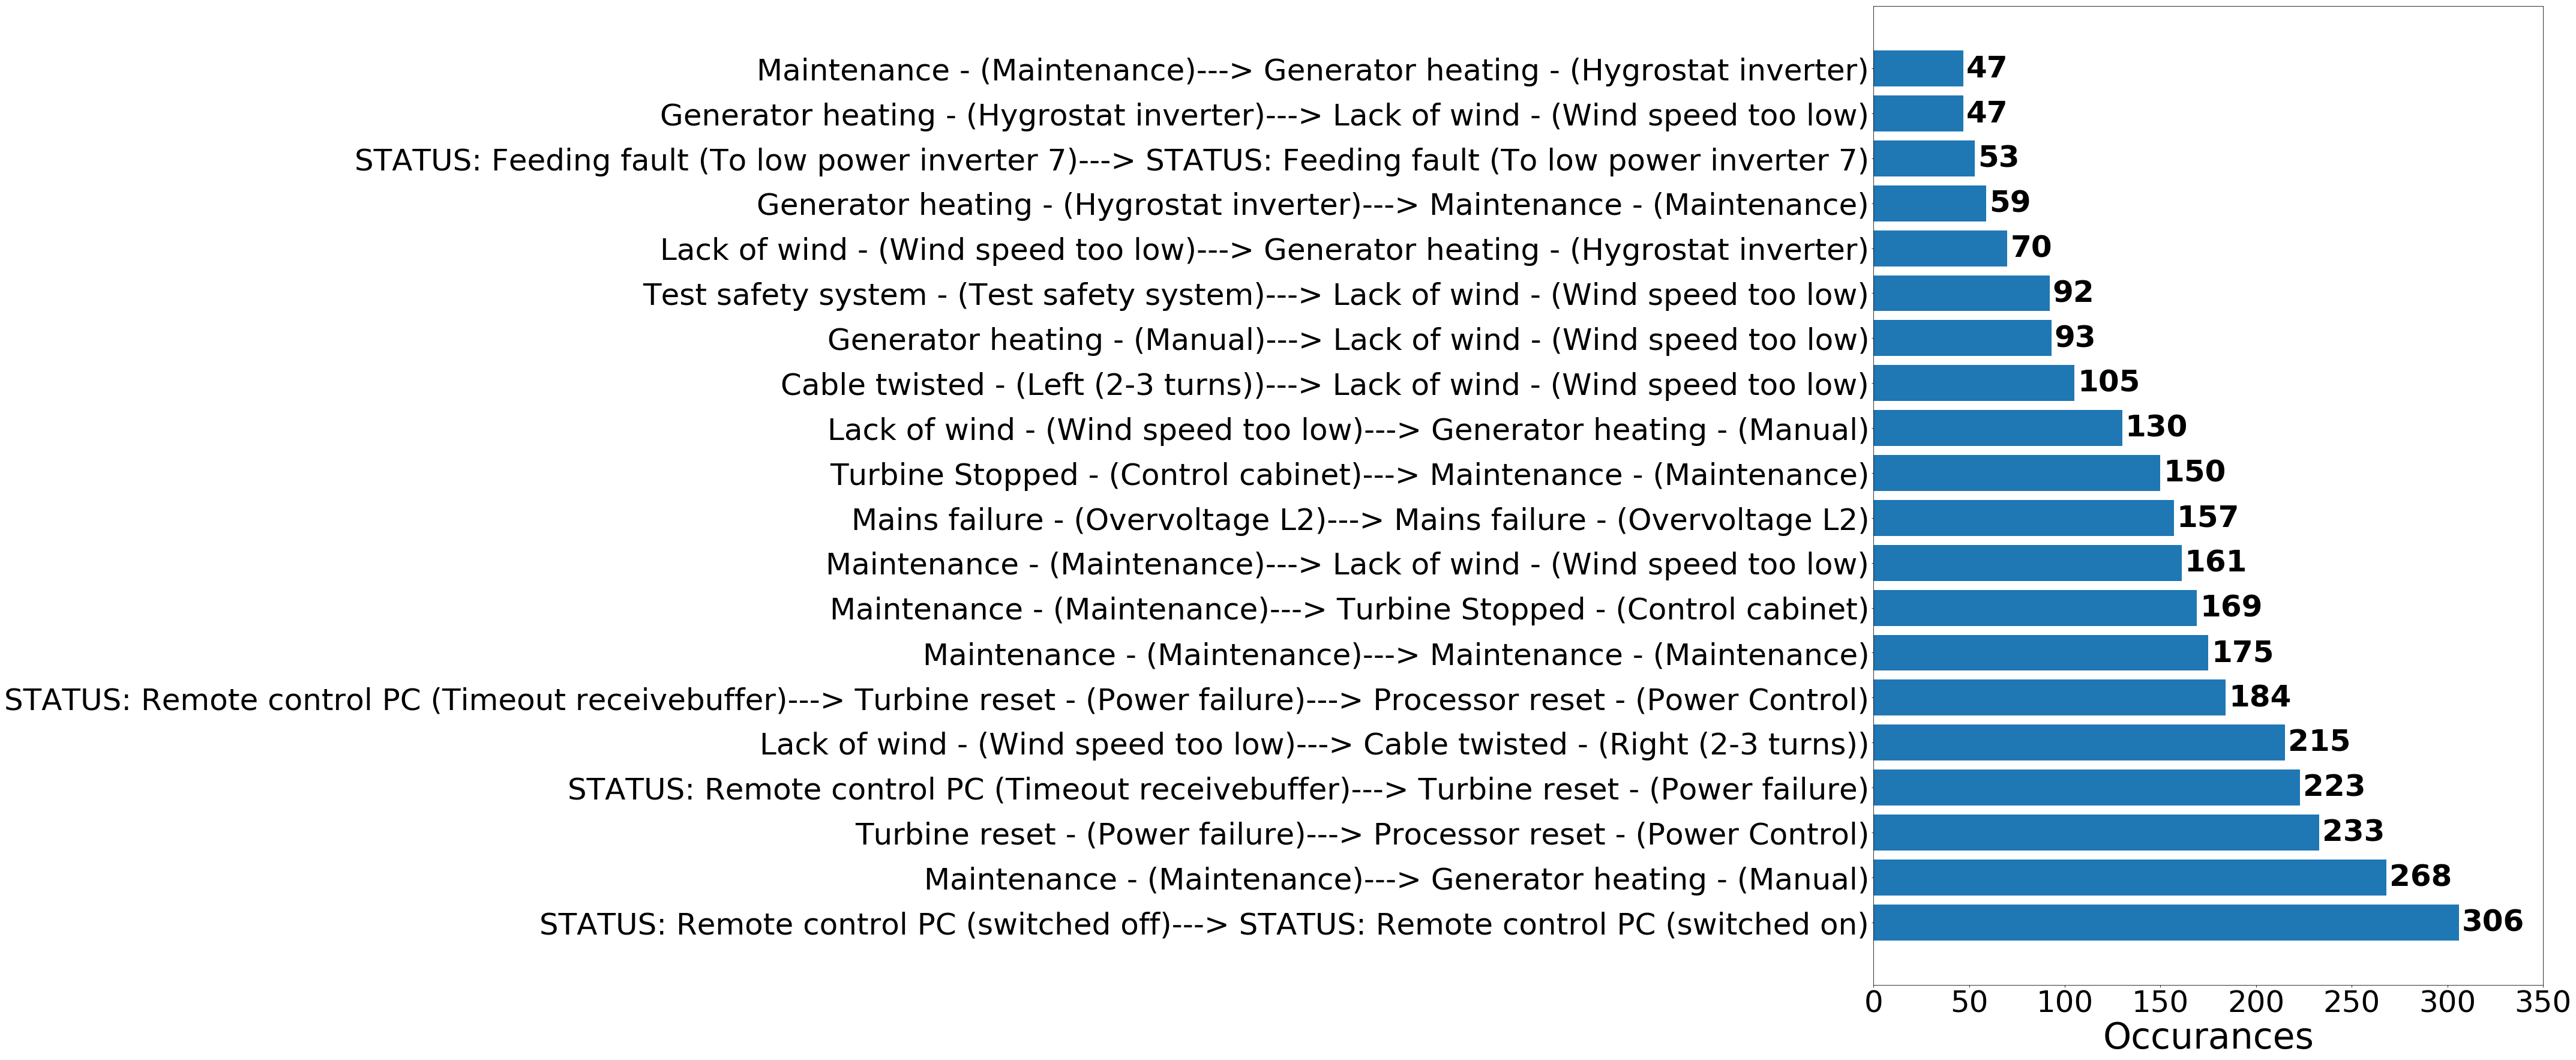

In [13]:
hour_limit = 0.05
counted_turbine_descriptions = countAlarmsForAllTurbines(individual_turbine_alarm, hour_limit)

#for turbine in counted_turbine_descriptions:
#    visualizeCount(counted_turbine_descriptions[turbine], turbine, hour_limit)
visualizeCount(counted_turbine_descriptions['All Turbines'], 'All Turbines', hour_limit)

### To produce Latex tables:

In [17]:
#df05 = pd.DataFrame(counted_turbine_descriptions['All Turbines'], columns=['Description','Count'])
#df05.head(50)
#def df_to_latex(dataframe):
#    text =  dataframe.to_latex(index=True)    
#    print()
#    print(text)

#df_to_latex(df05.head(100))